# <center>Rozwiązywanie układów równań</center>
# <center>Metody iteracyjne</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [10]:
import main
import scipy as sp
import numpy as np
import scipy.sparse.linalg as sp_linalg
import numpy.linalg as np_linalg
import matplotlib
import matplotlib.pyplot as plt

**Cel zajęć:**  
Celem zajęć jest zapoznanie się z iteracyjnymi metodami rozwiązywania układów równań liniowych w postaci macierzowej. Metody iteracyjne, w przeciwieństwie do analitycznych, nie zwracają dokładnego rozwiązania, a jedynie jego przybliżenie. Przy spełnionych kryteriach, przybliżenia obliczane w kolejnych iteracjach są zbieżne do dokładnego rozwiązania. Metody iteracyjne znajdują swoje zastosowanie szczególnie przy dużych układach równań postaci: 
   
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ to macierz współczynników z lewej strony równania, wektor $\mathbf{x}$ jest wektorem zmiennych a wektor $\mathbf{b}$ wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
Zdefiniuję funkcję *diag_dominant_matrix_A_b*, przyjmującą paramter całkowity $m>0$ która zwróci:
- macierz diagonalnie zdominowana $\mathbf{A}$ o wymiarach $m \times m$ (wyrazy na przekątnej sa wieksze co do modułu od sumy pozostałych w danej kolumnie i wierszu)
- wektor $\mathbf{b}$ o wymiarach $m \times 1$ 
 
o losowych wartościach całkowitych

Dodatkowo zdefiniuj funkcje *is_diag_dominant* sprawdzającą czy zadana macierz jest diagonalnie zdominowana

***Zadanie 2***   
Zdefiniuję funkcję *symmetric_matrix_A_b*, przyjmującą paramter całkowity $m>0$ która zwróci:
- symetryczną macierz $\mathbf{A}$ o wymiarach $m \times m$ (wyrazy symetryczne względnej przekątnej są sobie równe)
- wektor $\mathbf{b}$ o wymiarach $m \times 1$ 
 
o losowych wartościach całkowitych

Dodatkowo zdefiniuj funkcje is_symmetric sprawdzającą czy zadana macierz jest symetryczna

**Zadanie 3** 

Zdefiniuję następujące układy równań:

a) $\mathbf{A_1}$, $\mathbf{b_1}$: gdzie $\mathbf{A_1}$ jest macierzą o wymiarach $m \times m$, a $\mathbf{b_1}$ wektorem $m \times 1$, $m = 10$

b) $\mathbf{A_2}$, $\mathbf{b_2}$: gdzie $\mathbf{A_2}$ jest macierzą **diagonalnie zdominowaną** o wymiarach$m \times m$, a $\mathbf{b_2}$ wektorem $m \times 1$, $m = 10$
 
c) $\mathbf{A_3}$, $\mathbf{b_3}$: gdzie $\mathbf{A_3}$ jest macierzą **symetryczną** o wymiarach $m \times m$, a $\mathbf{b_3}$ wektorem $m \times 1$, $m = 10$   

Wskazówka: Do generacji macierzy użyj metody random_matrix_Ab z lab6 oraz metod diag_dominant_matrix_A_b i symmetric_matrix_A_b

In [11]:
m = 10
#a)
#Funkcja ta została skopiowana z zadania domowego nr 4 
A1, b1 = main.random_matrix_Ab(m)
#b)
A2, b2 = main.diag_dominant_matrix_A_b(m)
#c)
A3, b3 = main.symmetric_matrix_A_b(m)

***Zadanie 4***   
Zaimplementuj iteracyjną metodę *solve_jacobi*, rozwiązującą układ równań metodą Jacobiego zgodnie z dokumentacją w pliku *main.py*.
Szczegóły metody zostały przedstawione na wykładzie.

***Zadanie 5***   
Rozwiąż układ równań z Zadania 3 podpunkt a) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

In [18]:
def res_norm(A, x, b):
    return np.linalg.norm(b - A @ x)

In [19]:
#1) Funkcja solve z biblioteki numpy
if A1.shape[0] == A1.shape[1]:
    result = np.linalg.solve(A1,b1)
    print('Dokładność funkcji solve z biblioteki numpy wynosi: {0}'.format(res_norm(A1,result,b1)))
    saved_timing = %timeit -r 10 -n 100 -o result = np.linalg.solve(A1,b1)

Dokładność funkcji solve z biblioteki numpy wynosi: 5.197930934883577e-15
30.8 µs ± 9.09 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


In [21]:
#2) Zaimplementowana iteracyjna metoda solve_jacobi
if main.is_diag_dominant(A1):
    print('Warunki dotyczące macierzy są spełnione, ponieważ jest ona diagonalnie dominująca.')
else:
    print('Warunki dotyczące macierzy nie są spełnione, ponieważ nie jest ona diagonalnie dominująca.')

Warunki dotyczące macierzy nie są spełnione, ponieważ nie jest ona diagonalnie dominująca.


In [22]:
#3) Iteracyjna metoda gradientów sprzężonych z biblioteki scipy
if main.is_symmetric(A1):
    print('Warunki dotyczące macierzy są spełnione, ponieważ macierz jest symetryczna względem przekątnej.')
else:
    print('Warunki dotyczące macierzy nie są spełnione, ponieważ macierz nie jest symetryczna względem przekątnej.')

Warunki dotyczące macierzy nie są spełnione, ponieważ macierz nie jest symetryczna względem przekątnej.


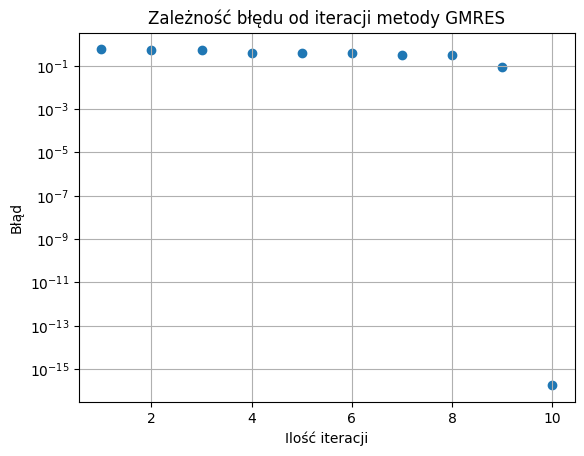

1 ms ± 383 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
The slowest run took 4.83 times longer than the fastest. This could mean that an intermediate result is being cached.
1.19 ms ± 526 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
1 ms ± 410 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
1.11 ms ± 409 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
1.09 ms ± 418 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
The slowest run took 4.58 times longer than the fastest. This could mean that an intermediate result is being cached.
1.05 ms ± 442 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
The slowest run took 4.93 times longer than the fastest. This could mean that an intermediate result is being cached.
1.13 ms ± 440 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
The slowest run took 4.10 times longer than the fastest. This could mean that an intermediate result is being cached.
1.02 ms ± 423 µs per loop (mean ± std

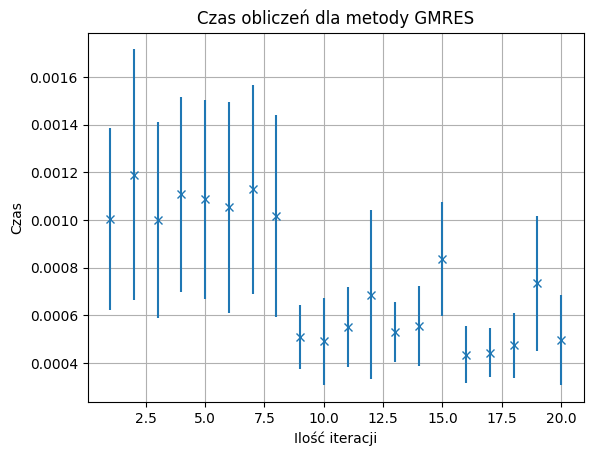

In [31]:
#4) Iteracyjna metody GMRES z biblioteki scipy
norms = []
iteration = []
timings = []
devs = []
numb_of_iter = []
def counter(x):
    norms.append(x)

x, inf = sp.sparse.linalg.gmres(A1,b1,maxiter = 20,callback=counter,callback_type='pr_norm')
for i in range(1,len(norms)+1):
    iteration.append(i)

plt.scatter(iteration, norms)
plt.semilogy()
plt.title('Zależność błędu od iteracji metody GMRES')
plt.xlabel('Ilość iteracji')
plt.ylabel('Błąd')
plt.grid()
plt.show()

for i in range(1,21):
    saved_timing = %timeit -r 10 -n 10 -o sp.sparse.linalg.gmres(A1,b1,maxiter = 20,callback=counter,callback_type='pr_norm')
    timings.append(saved_timing.average)
    devs.append(saved_timing.stdev)
    numb_of_iter.append(i)

plt.errorbar(numb_of_iter, timings, yerr=devs, ls="none", marker="x")
plt.title('Czas obliczeń dla metody GMRES')
plt.xlabel('Ilość iteracji')
plt.ylabel('Czas')
plt.grid()
plt.show()

***Zadanie 6***     
Rozwiąż układ równań z Zadania 3 podpunkt b) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

In [24]:
#1) Funkcja solve z biblioteki numpy
if A2.shape[0] == A2.shape[1]:
    result = np.linalg.solve(A2,b2)
    print('Dokładność funkcji solve z biblioteki numpy wynosi: {0}'.format(res_norm(A2,result,b2)))
    saved_timing = %timeit -r 10 -n 100 -o result = np.linalg.solve(A2,b2)

Dokładność funkcji solve z biblioteki numpy wynosi: 14.825655882007146
29.1 µs ± 5.1 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


Warunki dotyczące macierzy są spełnione, ponieważ jest ona diagonalnie dominująca.
737 µs ± 221 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
598 µs ± 101 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
517 µs ± 61.6 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
687 µs ± 177 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
823 µs ± 301 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
595 µs ± 147 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
519 µs ± 45.1 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
665 µs ± 170 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
559 µs ± 94.2 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
546 µs ± 87.3 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
550 µs ± 55.9 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
587 µs ± 133 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
650 µs ± 199 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
58

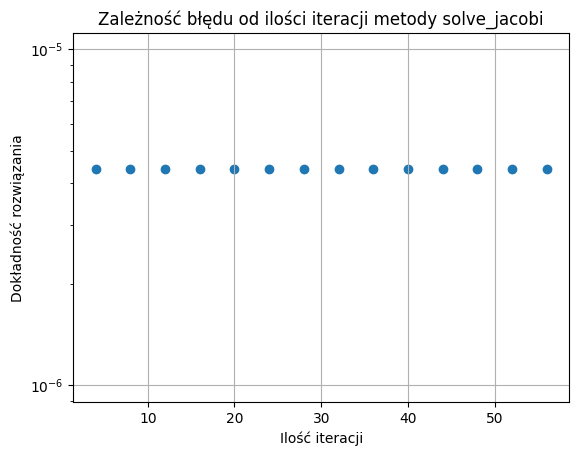

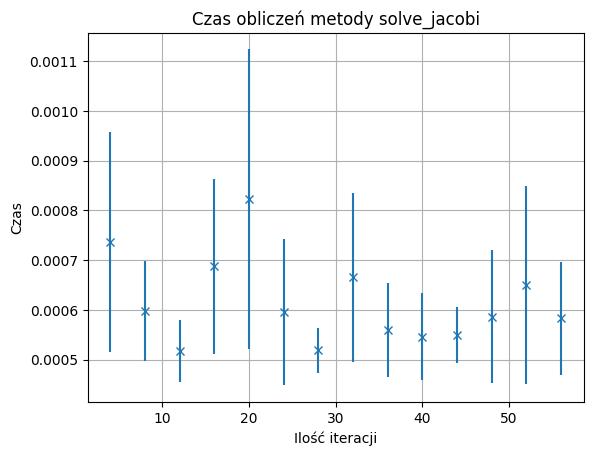

In [47]:
#2) Zaimplementowana iteracyjna metoda solve_jacobi
if main.is_diag_dominant(A2):
    print('Warunki dotyczące macierzy są spełnione, ponieważ jest ona diagonalnie dominująca.')
    numb_of_iteration = []
    results = []
    norms = []
    timings = []
    devs = []
    for i in range(1,60):
        if i % 4 == 0:
            numb_of_iteration.append(i)
    for iteration in numb_of_iteration:
        result = (main.solve_jacobi(A2,b2,np.ones((m,1)),maxiter = iter))[0]
        norms.append(res_norm(A2,result,b2))
        saved_timing = %timeit -r 10 -n 10 -o main.solve_jacobi(A2,b2,np.ones((m,1)),maxiter = iter)
        timings.append(saved_timing.average)
        devs.append(saved_timing.stdev)
else:
    print('Warunki dotyczące macierzy nie są spełnione, ponieważ nie jest ona diagonalnie dominująca.')

plt.scatter(numb_of_iteration, norms)
plt.title('Zależność błędu od ilości iteracji metody solve_jacobi')
plt.xlabel('Ilość iteracji')
plt.ylabel('Dokładność rozwiązania')
plt.semilogy()
plt.grid()
plt.show()

plt.errorbar(numb_of_iteration, timings, yerr=devs, ls="none", marker="x")
plt.title('Czas obliczeń metody solve_jacobi')
plt.xlabel('Ilość iteracji')
plt.ylabel('Czas')
plt.grid()
plt.show()

In [58]:
#3) Iteracyjna metoda gradientów sprzężonych z biblioteki scipy
if main.is_symmetric(A2):
    print('Warunki dotyczące macierzy są spełnione, ponieważ macierz jest symetryczna względem przekątnej.')
else:
    print('Warunki dotyczące macierzy nie są spełnione, ponieważ macierz nie jest symetryczna względem przekątnej.')

Warunki dotyczące macierzy nie są spełnione, ponieważ macierz nie jest symetryczna względem przekątnej.


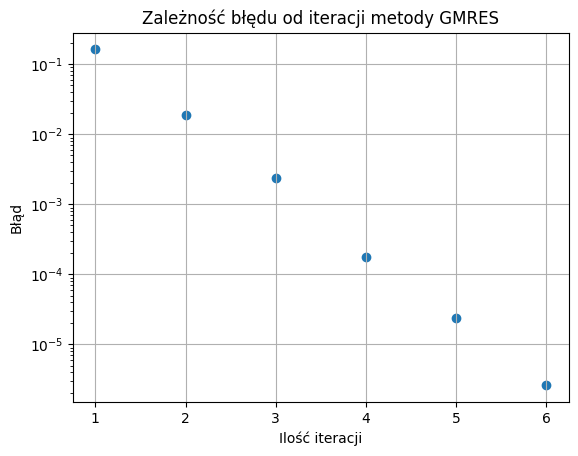

603 µs ± 203 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
879 µs ± 348 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
683 µs ± 155 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
593 µs ± 124 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
646 µs ± 178 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
527 µs ± 208 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
500 µs ± 170 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
612 µs ± 232 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
1.14 ms ± 375 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
The slowest run took 4.37 times longer than the fastest. This could mean that an intermediate result is being cached.
999 µs ± 463 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
The slowest run took 4.11 times longer than the fastest. This could mean that an intermediate result is being cached.
701 µs ± 349 µs per loop (mean ± std. dev. of 10 runs, 10 loops

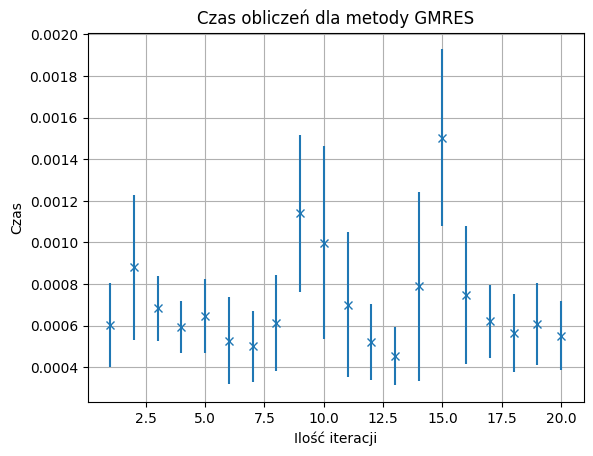

In [44]:
#4) Iteracyjna metody GMRES z biblioteki scipy
norms = []
iteration = []
timings = []
devs = []
numb_of_iteration = []
def counter(x):
    norms.append(x)

x, inf = sp.sparse.linalg.gmres(A2,b2,maxiter = 20,callback=counter,callback_type='pr_norm')
for i in range(1,len(norms)+1):
    iteration.append(i)

plt.scatter(iteration, norms)
plt.semilogy()
plt.title('Zależność błędu od iteracji metody GMRES')
plt.xlabel('Ilość iteracji')
plt.ylabel('Błąd')
plt.grid()
plt.show()

for i in range(1,21):
    saved_timing = %timeit -r 10 -n 10 -o sp.sparse.linalg.gmres(A1,b1,maxiter = 20,callback=counter,callback_type='pr_norm')
    timings.append(saved_timing.average)
    devs.append(saved_timing.stdev)
    numb_of_iter.append(i)

plt.errorbar(numb_of_iteration, timings, yerr=devs, ls="none", marker="x")
plt.title('Czas obliczeń dla metody GMRES')
plt.xlabel('Ilość iteracji')
plt.ylabel('Czas')
plt.grid()
plt.show()

***Zadanie 7***   
Rozwiąż układ równań z Zadania 3 podpunkt c) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

In [61]:
#1) Funkcja solve z biblioteki numpy
if A3.shape[0] == A3.shape[1]:
    result = np.linalg.solve(A3,b3)
    print('Dokładność funkcji solve z biblioteki numpy wynosi: {0}'.format(res_norm(A3,result,b3)))
    saved_timing = %timeit -r 10 -n 100 -o result = np.linalg.solve(A3,b3)

Dokładność funkcji solve z biblioteki numpy wynosi: 8.97016233590804e-15
32.5 µs ± 7.94 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


In [59]:
#2) Zaimplementowana iteracyjna metoda solve_jacobi
if main.is_diag_dominant(A3):
    print('Warunki dotyczące macierzy są spełnione, ponieważ jest ona diagonalnie dominująca.')
else:
    print('Warunki dotyczące macierzy nie są spełnione, ponieważ nie jest ona diagonalnie dominująca.')

Warunki dotyczące macierzy nie są spełnione, ponieważ nie jest ona diagonalnie dominująca.


381 µs ± 192 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
340 µs ± 37.1 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
369 µs ± 102 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
530 µs ± 136 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
303 µs ± 96.3 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
333 µs ± 102 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
336 µs ± 71.4 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
459 µs ± 157 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
460 µs ± 124 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
434 µs ± 63.4 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
588 µs ± 167 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
746 µs ± 260 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
883 µs ± 260 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
694 µs ± 263 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
481 µs ± 132 µs per loop (mean

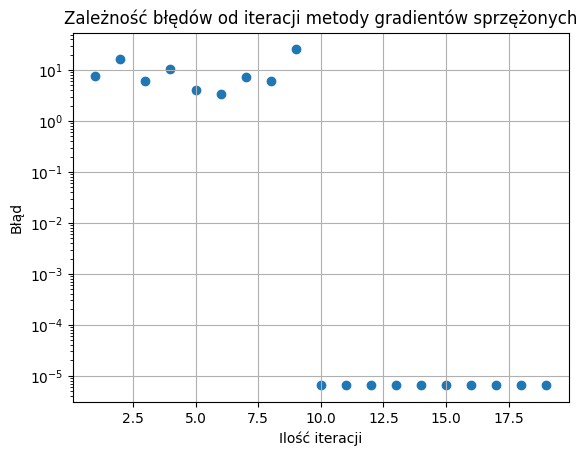

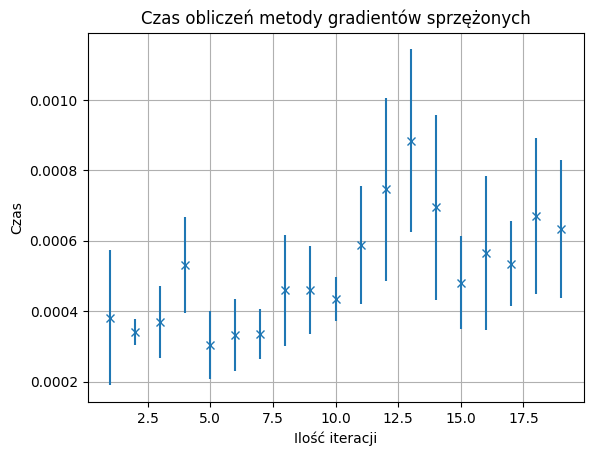

In [60]:
#3) Iteracyjna metoda gradientów sprzężonych z biblioteki scipy
if main.is_symmetric(A3):
    norms = []
    timings = []
    devs = []
    numb_of_iteration = []
    for i in range(1,20):
        numb_of_iteration.append(i)
    for iteration in numb_of_iteration:
        result = (sp.sparse.linalg.cg(A3,b3,maxiter = iteration))[0]
        norms.append(res_norm(A3,result,b3))
        saved_timing = %timeit -r 5 -n 10 -o sp.sparse.linalg.cg(A3,b3,maxiter = iteration)
        timings.append(saved_timing.average)
        devs.append(saved_timing.stdev)
    print('Warunki dotyczące macierzy są spełnione, ponieważ macierz jest symetryczna względem przekątnej.')
    plt.scatter(numb_of_iteration, norms)
    plt.semilogy()
    plt.title('Zależność błędów od iteracji metody gradientów sprzężonych')
    plt.xlabel('Ilość iteracji')
    plt.ylabel('Błąd')
    plt.grid()
    plt.show()



    plt.errorbar(numb_of_iteration, timings, yerr=devs, ls="none", marker="x")
    plt.title('Czas obliczeń metody gradientów sprzężonych')
    plt.xlabel('Ilość iteracji')
    plt.ylabel('Czas')
    plt.grid()
    plt.show()
else:
    print('Warunki dotyczące macierzy nie są spełnione, ponieważ macierz nie jest symetryczna względem przekątnej.')


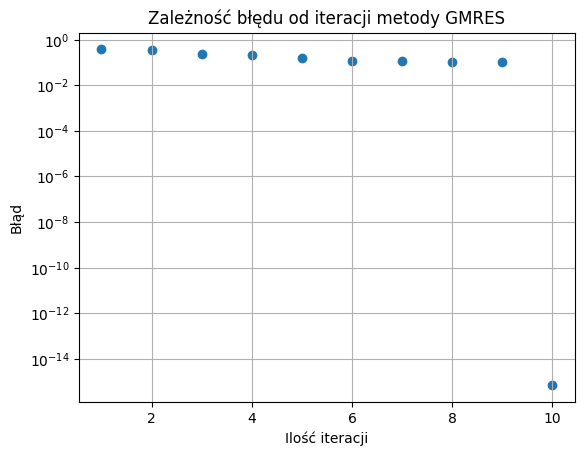

1.05 ms ± 244 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
1.23 ms ± 443 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
1.13 ms ± 251 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
831 µs ± 91.6 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
993 µs ± 115 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
999 µs ± 140 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
703 µs ± 275 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
459 µs ± 101 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
409 µs ± 49.7 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
500 µs ± 107 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
477 µs ± 96.1 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
604 µs ± 132 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
766 µs ± 217 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
615 µs ± 252 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
536 µs ± 140 µs per loop (me

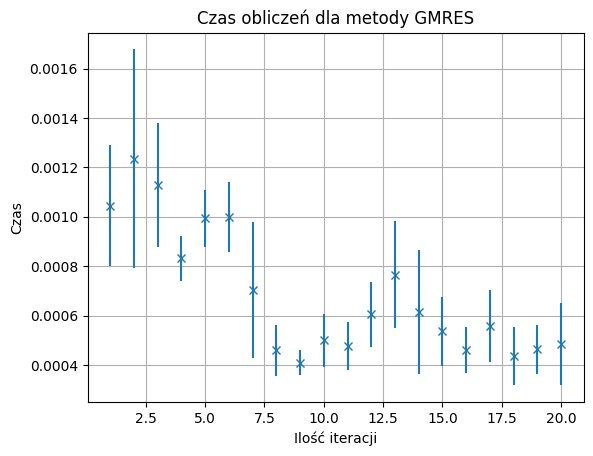

In [55]:
#4) Iteracyjna metody GMRES z biblioteki scipy
norms = []
iteration = []
timings = []
devs = []
numb_of_iteration = []

x, inf = sp.sparse.linalg.gmres(A3,b3,maxiter = 10000,callback=counter,callback_type='pr_norm')
for i in range(1,len(norms)+1):
    iteration.append(i)

plt.scatter(iteration, norms)
plt.semilogy()
plt.title('Zależność błędu od iteracji metody GMRES')
plt.xlabel('Ilość iteracji')
plt.ylabel('Błąd')
plt.grid()
plt.show()

for i in range(1,21):
    saved_timing = %timeit -r 5 -n 10 -o sp.sparse.linalg.gmres(A3,b3,maxiter = i,callback=counter,callback_type='pr_norm')
    timings.append(saved_timing.average)
    devs.append(saved_timing.stdev)
    numb_of_iteration.append(i)

plt.errorbar(numb_of_iteration, timings, yerr=devs, ls="none", marker="x")
plt.title('Czas obliczeń dla metody GMRES')
plt.xlabel('Ilość iteracji')
plt.ylabel('Czas')
plt.grid()
plt.show()

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)

**Wnioski**

Podczas tego labolatorium przećwiczyłam swoje umiejętności iteracyjnych metod rozwiązywania układów równań liniowych w postaci macierzowej. Itercyjne metody przybliżonych rozwiązań układów równań posiadają mniejszą złożoność obliczeniową niż metody dokładne, niestety niektóre z nich nie dają porządanych efektów, tzn. wraz ze wzrostem ilości iteracji otrzmane rozwiązanie nie zbliża się do dokładnego rozwiązania.